<a href="https://colab.research.google.com/github/pavbhaji7/Machine-Learning-Problems/blob/main/Experiment_8_728.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXERCISE 8: CART (CLASSIFICATION AND REGRESSION TREES)

1. Decision Tree Fundamentals...

CART (Classification and Regression Trees):

1. CLASSIFICATION TREES:
   • Split criterion: Gini impurity or Entropy
   • Gini = 1 - Σ(p_i²) where p_i is class probability
   • Entropy = -Σ(p_i * log2(p_i))
   • Minimize impurity at each split

2. REGRESSION TREES:
   • Split criterion: Mean Squared Error (MSE)
   • Minimize variance within nodes
   • Predict mean value of samples in leaf

3. SPLITTING PROCESS:
   • Greedy algorithm (top-down)
   • Find best feature and threshold
   • Recursively split until stopping criteria
   • Stopping: max_depth, min_samples_split, etc.

4. PRUNING:
   • Pre-pruning: Stop early (max_depth, min_samples_leaf)
   • Post-pruning: Build full tree, then trim (cost-complexity)
   • Prevents overfitting

5. ADVANTAGES:
   • Interpretable and visualizable
   • Handles non-linear relationships
   • No feature scaling needed
   • Handles mixed data types
   • Feature im

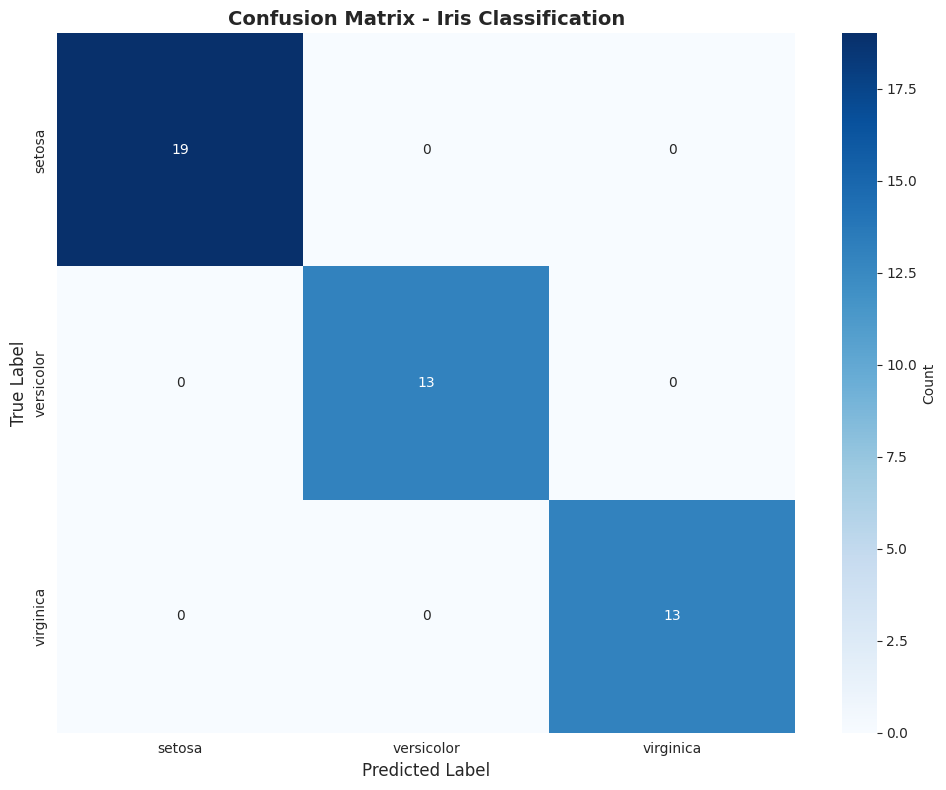


2.3 Visualizing Decision Tree...


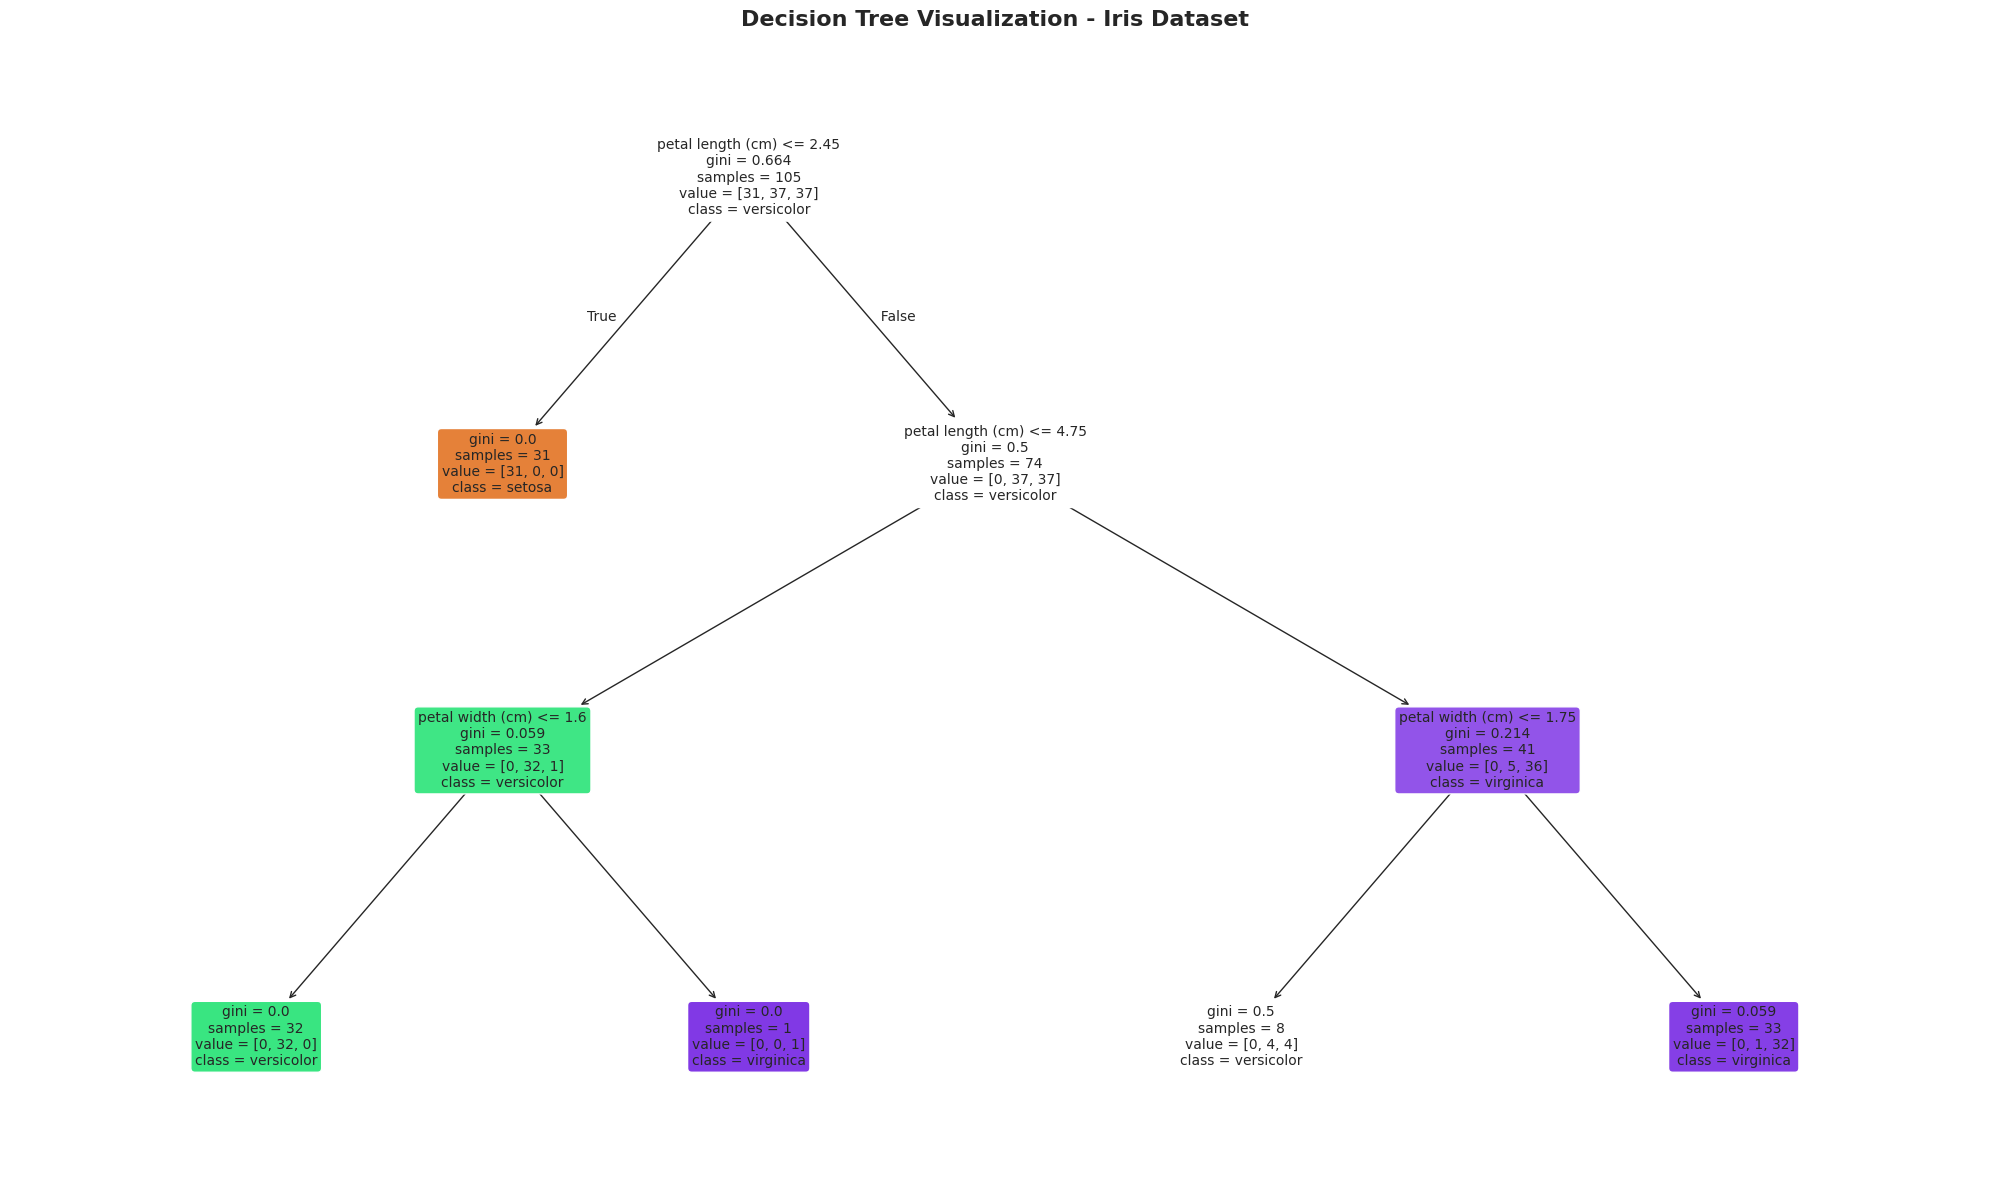


2.4 Decision Tree Rules (Text Format):
|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.60
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.60
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- class: 2


2.5 Feature Importance:
             Feature  Importance
2  petal length (cm)    0.925108
3   petal width (cm)    0.074892
1   sepal width (cm)    0.000000
0  sepal length (cm)    0.000000


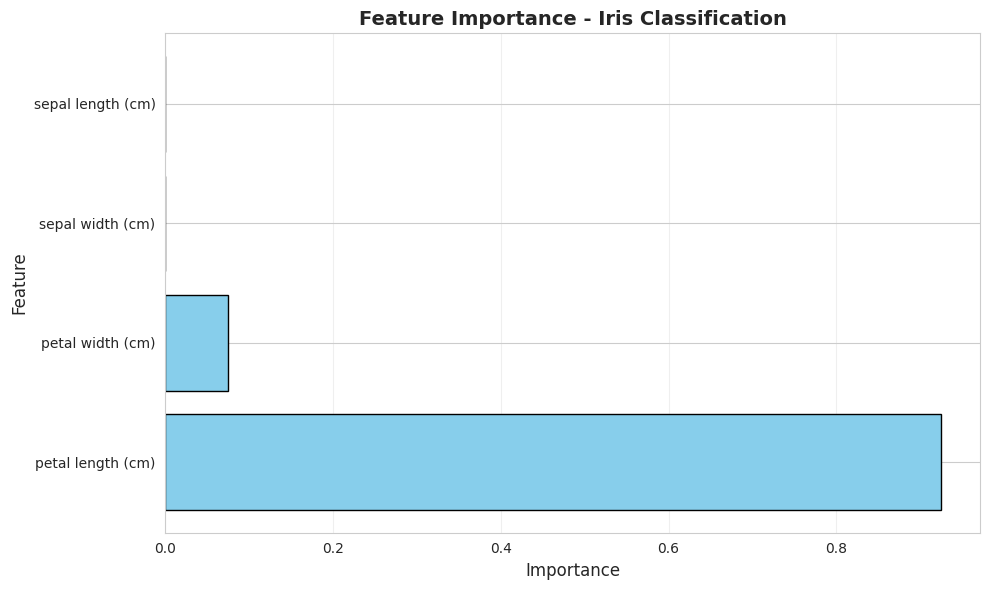


3. ANALYZING TREE DEPTH IMPACT

3.1 Training Trees with Different Depths...

Max Depth = 1:
  • Train Accuracy: 0.6476
  • Test Accuracy: 0.7111
  • Number of Nodes: 3
  • Number of Leaves: 2

Max Depth = 2:
  • Train Accuracy: 0.9429
  • Test Accuracy: 0.9778
  • Number of Nodes: 5
  • Number of Leaves: 3

Max Depth = 3:
  • Train Accuracy: 0.9524
  • Test Accuracy: 1.0000
  • Number of Nodes: 9
  • Number of Leaves: 5

Max Depth = 4:
  • Train Accuracy: 0.9714
  • Test Accuracy: 1.0000
  • Number of Nodes: 13
  • Number of Leaves: 7

Max Depth = 5:
  • Train Accuracy: 0.9905
  • Test Accuracy: 1.0000
  • Number of Nodes: 17
  • Number of Leaves: 9

Max Depth = 10:
  • Train Accuracy: 1.0000
  • Test Accuracy: 1.0000
  • Number of Nodes: 19
  • Number of Leaves: 10

Max Depth = 15:
  • Train Accuracy: 1.0000
  • Test Accuracy: 1.0000
  • Number of Nodes: 19
  • Number of Leaves: 10

Max Depth = 20:
  • Train Accuracy: 1.0000
  • Test Accuracy: 1.0000
  • Number of Nodes: 19
  • Numbe

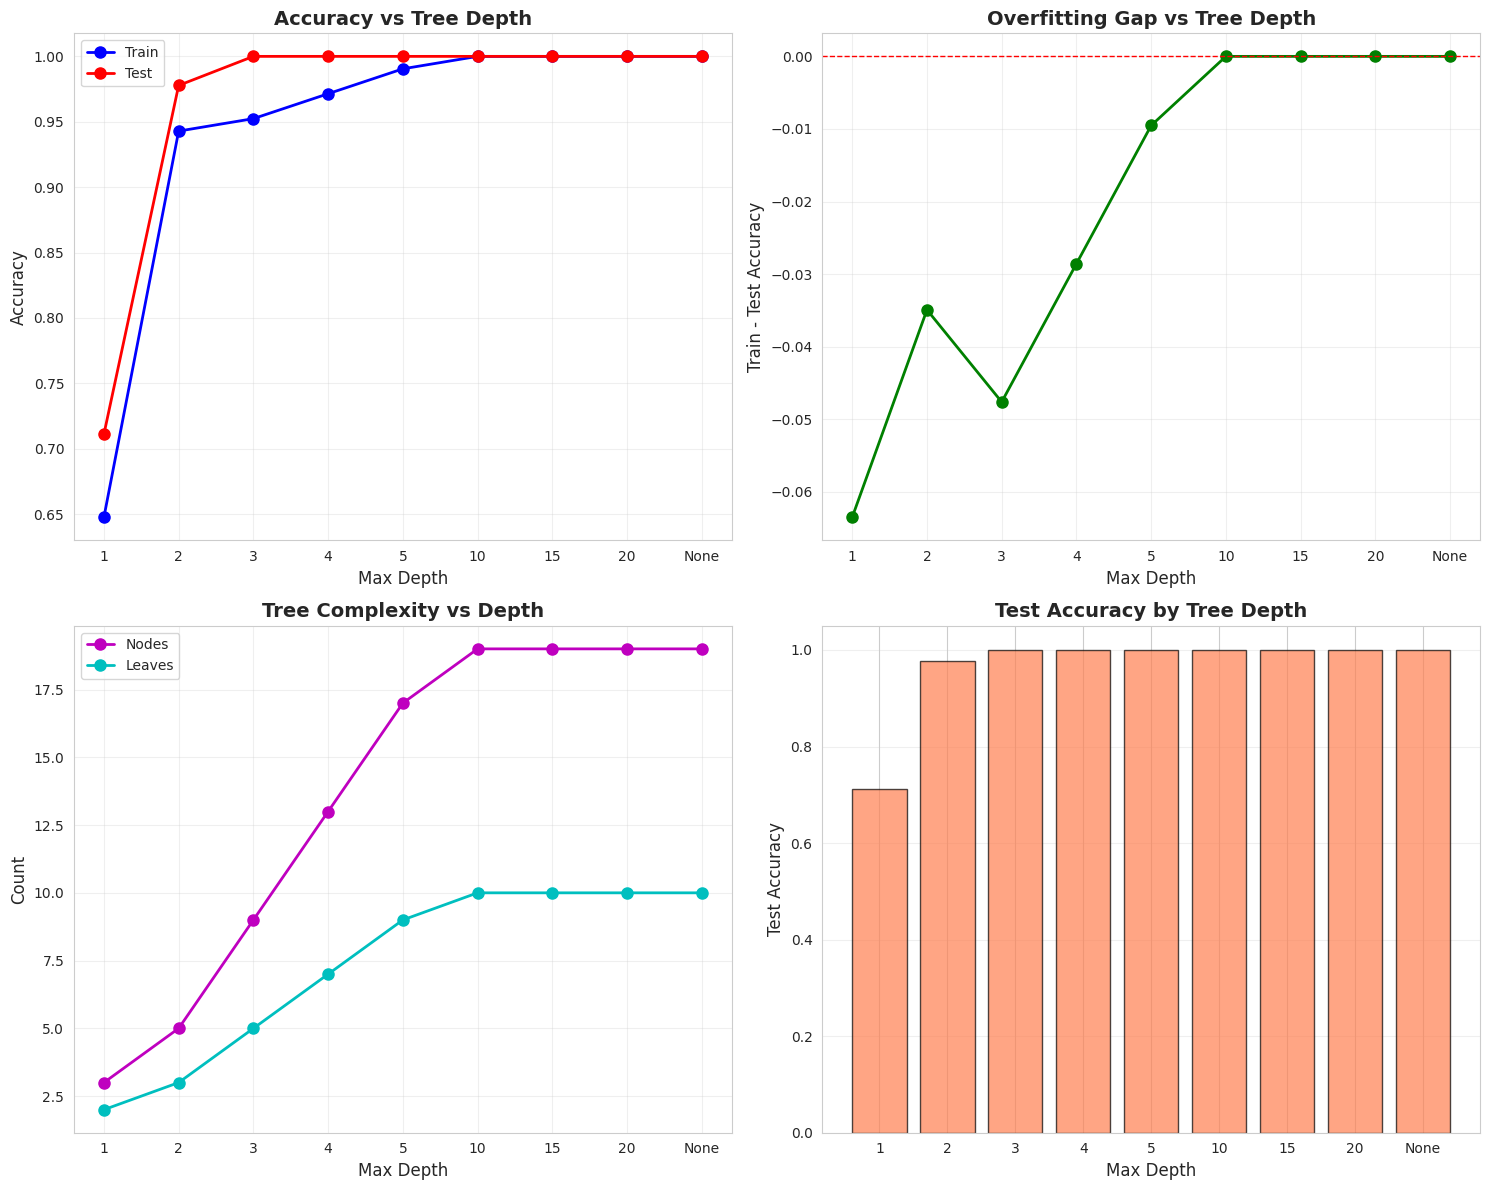


4. HYPERPARAMETER TUNING

4.1 Performing Grid Search...


In [ ]:
# Exercise 8: CART (Classification and Regression Trees)
# Comprehensive implementation of decision trees

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import export_text, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                            mean_squared_error, r2_score, mean_absolute_error)
from sklearn.datasets import (load_iris, load_wine, load_breast_cancer,
                              load_diabetes, make_classification, make_regression)
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

print("="*70)
print("EXERCISE 8: CART (CLASSIFICATION AND REGRESSION TREES)")
print("="*70)

# ============================================================================
# 1. DECISION TREE THEORY AND BASICS
# ============================================================================

print("\n1. Decision Tree Fundamentals...")
print("""
CART (Classification and Regression Trees):

1. CLASSIFICATION TREES:
   • Split criterion: Gini impurity or Entropy
   • Gini = 1 - Σ(p_i²) where p_i is class probability
   • Entropy = -Σ(p_i * log2(p_i))
   • Minimize impurity at each split

2. REGRESSION TREES:
   • Split criterion: Mean Squared Error (MSE)
   • Minimize variance within nodes
   • Predict mean value of samples in leaf

3. SPLITTING PROCESS:
   • Greedy algorithm (top-down)
   • Find best feature and threshold
   • Recursively split until stopping criteria
   • Stopping: max_depth, min_samples_split, etc.

4. PRUNING:
   • Pre-pruning: Stop early (max_depth, min_samples_leaf)
   • Post-pruning: Build full tree, then trim (cost-complexity)
   • Prevents overfitting

5. ADVANTAGES:
   • Interpretable and visualizable
   • Handles non-linear relationships
   • No feature scaling needed
   • Handles mixed data types
   • Feature importance

6. DISADVANTAGES:
   • Prone to overfitting
   • Unstable (small data changes → different tree)
   • Biased toward dominant classes
   • Not ideal for extrapolation
""")

# ============================================================================
# 2. CLASSIFICATION TREE - IRIS DATASET
# ============================================================================

print("\n" + "="*70)
print("2. CLASSIFICATION TREE - IRIS DATASET")
print("="*70)

print("\n2.1 Loading and Preparing Iris Dataset...")

iris = load_iris()
X_iris = iris.data
y_iris = iris.target

print(f"Dataset shape: {X_iris.shape}")
print(f"Classes: {iris.target_names}")
print(f"Features: {iris.feature_names}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris,
                                                      test_size=0.3,
                                                      random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

print("\n2.2 Training Decision Tree Classifier...")

# Train decision tree
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=3)
dt_classifier.fit(X_train, y_train)

# Predictions
y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

# Evaluate
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred, target_names=iris.target_names))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Iris Classification', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

print("\n2.3 Visualizing Decision Tree...")

# Plot tree
plt.figure(figsize=(20, 12))
plot_tree(dt_classifier,
         feature_names=iris.feature_names,
         class_names=iris.target_names,
         filled=True,
         rounded=True,
         fontsize=10)
plt.title('Decision Tree Visualization - Iris Dataset', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Text representation
print("\n2.4 Decision Tree Rules (Text Format):")
tree_rules = export_text(dt_classifier, feature_names=iris.feature_names)
print(tree_rules)

# Feature importance
print("\n2.5 Feature Importance:")
feature_importance = pd.DataFrame({
    'Feature': iris.feature_names,
    'Importance': dt_classifier.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'],
        color='skyblue', edgecolor='black')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance - Iris Classification', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================================
# 3. EFFECT OF TREE DEPTH
# ============================================================================

print("\n" + "="*70)
print("3. ANALYZING TREE DEPTH IMPACT")
print("="*70)

print("\n3.1 Training Trees with Different Depths...")

max_depths = [1, 2, 3, 4, 5, 10, 15, 20, None]
train_accuracies = []
test_accuracies = []
n_nodes = []
n_leaves = []

for depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, dt.predict(X_train))
    test_acc = accuracy_score(y_test, dt.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    n_nodes.append(dt.tree_.node_count)
    n_leaves.append(dt.tree_.n_leaves)

    depth_str = str(depth) if depth is not None else "Unlimited"
    print(f"\nMax Depth = {depth_str}:")
    print(f"  • Train Accuracy: {train_acc:.4f}")
    print(f"  • Test Accuracy: {test_acc:.4f}")
    print(f"  • Number of Nodes: {dt.tree_.node_count}")
    print(f"  • Number of Leaves: {dt.tree_.n_leaves}")

# Visualize results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

depth_labels = [str(d) if d is not None else 'None' for d in max_depths]

# Accuracy vs depth
axes[0, 0].plot(range(len(max_depths)), train_accuracies, 'bo-',
               label='Train', linewidth=2, markersize=8)
axes[0, 0].plot(range(len(max_depths)), test_accuracies, 'ro-',
               label='Test', linewidth=2, markersize=8)
axes[0, 0].set_xticks(range(len(max_depths)))
axes[0, 0].set_xticklabels(depth_labels)
axes[0, 0].set_xlabel('Max Depth', fontsize=12)
axes[0, 0].set_ylabel('Accuracy', fontsize=12)
axes[0, 0].set_title('Accuracy vs Tree Depth', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Overfitting gap
overfitting_gap = np.array(train_accuracies) - np.array(test_accuracies)
axes[0, 1].plot(range(len(max_depths)), overfitting_gap, 'go-',
               linewidth=2, markersize=8)
axes[0, 1].axhline(y=0, color='red', linestyle='--', linewidth=1)
axes[0, 1].set_xticks(range(len(max_depths)))
axes[0, 1].set_xticklabels(depth_labels)
axes[0, 1].set_xlabel('Max Depth', fontsize=12)
axes[0, 1].set_ylabel('Train - Test Accuracy', fontsize=12)
axes[0, 1].set_title('Overfitting Gap vs Tree Depth', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Tree complexity
axes[1, 0].plot(range(len(max_depths)), n_nodes, 'mo-',
               label='Nodes', linewidth=2, markersize=8)
axes[1, 0].plot(range(len(max_depths)), n_leaves, 'co-',
               label='Leaves', linewidth=2, markersize=8)
axes[1, 0].set_xticks(range(len(max_depths)))
axes[1, 0].set_xticklabels(depth_labels)
axes[1, 0].set_xlabel('Max Depth', fontsize=12)
axes[1, 0].set_ylabel('Count', fontsize=12)
axes[1, 0].set_title('Tree Complexity vs Depth', fontsize=14, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Test accuracy bar chart
axes[1, 1].bar(range(len(max_depths)), test_accuracies,
              color='coral', edgecolor='black', alpha=0.7)
axes[1, 1].set_xticks(range(len(max_depths)))
axes[1, 1].set_xticklabels(depth_labels)
axes[1, 1].set_xlabel('Max Depth', fontsize=12)
axes[1, 1].set_ylabel('Test Accuracy', fontsize=12)
axes[1, 1].set_title('Test Accuracy by Tree Depth', fontsize=14, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# 4. HYPERPARAMETER TUNING WITH GRID SEARCH
# ============================================================================

print("\n" + "="*70)
print("4. HYPERPARAMETER TUNING")
print("="*70)

print("\n4.1 Performing Grid Search...")

# Define parameter grid
param_grid = {
    'max_depth': [2, 3, 4, 5, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']
}

# Grid search with cross-validation
dt_grid = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt_grid, param_grid, cv=5,
                          scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Train with best parameters
best_dt = grid_search.best_estimator_
y_test_pred_best = best_dt.predict(X_test)
best_test_accuracy = accuracy_score(y_test, y_test_pred_best)

print(f"Test accuracy with best params: {best_test_accuracy:.4f}")

# Visualize grid search results
results_df = pd.DataFrame(grid_search.cv_results_)
results_df = results_df.sort_values('rank_test_score')

print("\nTop 10 Parameter Combinations:")
print(results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']].head(10))

# ============================================================================
# 5. REGRESSION TREE - DIABETES DATASET
# ============================================================================

print("\n" + "="*70)
print("5. REGRESSION TREE - DIABETES DATASET")
print("="*70)

print("\n5.1 Loading and Preparing Diabetes Dataset...")

diabetes = load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target

print(f"Dataset shape: {X_diabetes.shape}")
print(f"Features: {diabetes.feature_names}")
print(f"Target: Disease progression measure")

# Split data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_diabetes, y_diabetes, test_size=0.3, random_state=42
)

print(f"Training set: {X_train_reg.shape[0]} samples")
print(f"Test set: {X_test_reg.shape[0]} samples")

print("\n5.2 Training Decision Tree Regressor...")

# Train regression tree
dt_regressor = DecisionTreeRegressor(random_state=42, max_depth=4)
dt_regressor.fit(X_train_reg, y_train_reg)

# Predictions
y_train_pred_reg = dt_regressor.predict(X_train_reg)
y_test_pred_reg = dt_regressor.predict(X_test_reg)

# Evaluate
train_mse = mean_squared_error(y_train_reg, y_train_pred_reg)
test_mse = mean_squared_error(y_test_reg, y_test_pred_reg)
train_r2 = r2_score(y_train_reg, y_train_pred_reg)
test_r2 = r2_score(y_test_reg, y_test_pred_reg)
test_mae = mean_absolute_error(y_test_reg, y_test_pred_reg)

print(f"\nTraining MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")
print(f"Test MAE: {test_mae:.4f}")

# Visualize predictions
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Actual vs Predicted (Train)
axes[0, 0].scatter(y_train_reg, y_train_pred_reg, alpha=0.5,
                  edgecolors='k', s=50)
axes[0, 0].plot([y_train_reg.min(), y_train_reg.max()],
               [y_train_reg.min(), y_train_reg.max()],
               'r--', linewidth=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Values', fontsize=12)
axes[0, 0].set_ylabel('Predicted Values', fontsize=12)
axes[0, 0].set_title(f'Training Set (R² = {train_r2:.4f})',
                    fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Actual vs Predicted (Test)
axes[0, 1].scatter(y_test_reg, y_test_pred_reg, alpha=0.5,
                  edgecolors='k', s=50, color='orange')
axes[0, 1].plot([y_test_reg.min(), y_test_reg.max()],
               [y_test_reg.min(), y_test_reg.max()],
               'r--', linewidth=2, label='Perfect Prediction')
axes[0, 1].set_xlabel('Actual Values', fontsize=12)
axes[0, 1].set_ylabel('Predicted Values', fontsize=12)
axes[0, 1].set_title(f'Test Set (R² = {test_r2:.4f})',
                    fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Residuals (Train)
residuals_train = y_train_reg - y_train_pred_reg
axes[1, 0].scatter(y_train_pred_reg, residuals_train, alpha=0.5,
                  edgecolors='k', s=50)
axes[1, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Predicted Values', fontsize=12)
axes[1, 0].set_ylabel('Residuals', fontsize=12)
axes[1, 0].set_title('Residual Plot - Training Set', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Residuals (Test)
residuals_test = y_test_reg - y_test_pred_reg
axes[1, 1].scatter(y_test_pred_reg, residuals_test, alpha=0.5,
                  edgecolors='k', s=50, color='orange')
axes[1, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Predicted Values', fontsize=12)
axes[1, 1].set_ylabel('Residuals', fontsize=12)
axes[1, 1].set_title('Residual Plot - Test Set', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n5.3 Feature Importance (Regression Tree):")
feature_importance_reg = pd.DataFrame({
    'Feature': diabetes.feature_names,
    'Importance': dt_regressor.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance_reg)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_reg['Feature'], feature_importance_reg['Importance'],
        color='lightcoral', edgecolor='black')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance - Diabetes Regression', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n5.4 Visualizing Regression Tree...")

# Plot regression tree
plt.figure(figsize=(20, 12))
plot_tree(dt_regressor,
         feature_names=diabetes.feature_names,
         filled=True,
         rounded=True,
         fontsize=9)
plt.title('Decision Tree Visualization - Diabetes Regression',
         fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================================
# 6. COMPARING DIFFERENT SPLITTING CRITERIA
# ============================================================================

print("\n" + "="*70)
print("6. COMPARING SPLITTING CRITERIA")
print("="*70)

print("\n6.1 Training with Different Criteria...")

# Load breast cancer dataset for binary classification
cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target

X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(
    X_cancer, y_cancer, test_size=0.3, random_state=42
)

criteria = ['gini', 'entropy']
results_criteria = {}

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

for idx, criterion in enumerate(criteria):
    # Train model
    dt = DecisionTreeClassifier(criterion=criterion, max_depth=5, random_state=42)
    dt.fit(X_train_cancer, y_train_cancer)

    # Evaluate
    train_acc = accuracy_score(y_train_cancer, dt.predict(X_train_cancer))
    test_acc = accuracy_score(y_test_cancer, dt.predict(X_test_cancer))

    # Cross-validation
    cv_scores = cross_val_score(dt, X_cancer, y_cancer, cv=5)

    results_criteria[criterion] = {
        'train_acc': train_acc,
        'test_acc': test_acc,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'n_nodes': dt.tree_.node_count,
        'n_leaves': dt.tree_.n_leaves
    }

    print(f"\n{criterion.upper()} Criterion:")
    print(f"  • Train Accuracy: {train_acc:.4f}")
    print(f"  • Test Accuracy: {test_acc:.4f}")
    print(f"  • CV Mean: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
    print(f"  • Tree Nodes: {dt.tree_.node_count}")
    print(f"  • Tree Leaves: {dt.tree_.n_leaves}")

    # Visualize tree
    plot_tree(dt, feature_names=cancer.feature_names,
             class_names=cancer.target_names,
             filled=True, rounded=True, fontsize=6, ax=axes[idx])
    axes[idx].set_title(f'Decision Tree - {criterion.upper()} Criterion',
                       fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Compare metrics
comparison_df = pd.DataFrame(results_criteria).T
print("\nCriterion Comparison:")
print(comparison_df)

# ============================================================================
# 7. PRUNING AND REGULARIZATION
# ============================================================================

print("\n" + "="*70)
print("7. PRUNING AND REGULARIZATION")
print("="*70)

print("\n7.1 Cost-Complexity Pruning...")

# Train full tree
dt_full = DecisionTreeClassifier(random_state=42)
dt_full.fit(X_train, y_train)

# Get cost-complexity pruning path
path = dt_full.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

print(f"Number of alpha values: {len(ccp_alphas)}")
print(f"Alpha range: [{ccp_alphas.min():.6f}, {ccp_alphas.max():.6f}]")

# Train trees with different alpha values
train_scores = []
test_scores = []
n_nodes_list = []
n_leaves_list = []

for ccp_alpha in ccp_alphas[:-1]:  # Exclude last alpha (empty tree)
    dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    dt.fit(X_train, y_train)

    train_scores.append(accuracy_score(y_train, dt.predict(X_train)))
    test_scores.append(accuracy_score(y_test, dt.predict(X_test)))
    n_nodes_list.append(dt.tree_.node_count)
    n_leaves_list.append(dt.tree_.n_leaves)

# Visualize pruning results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Accuracy vs alpha
axes[0, 0].plot(ccp_alphas[:-1], train_scores, 'bo-',
               label='Train', linewidth=2, markersize=6)
axes[0, 0].plot(ccp_alphas[:-1], test_scores, 'ro-',
               label='Test', linewidth=2, markersize=6)
axes[0, 0].set_xlabel('Cost-Complexity Parameter (α)', fontsize=12)
axes[0, 0].set_ylabel('Accuracy', fontsize=12)
axes[0, 0].set_title('Accuracy vs Pruning Strength', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Tree size vs alpha
axes[0, 1].plot(ccp_alphas[:-1], n_nodes_list, 'go-',
               label='Nodes', linewidth=2, markersize=6)
axes[0, 1].plot(ccp_alphas[:-1], n_leaves_list, 'mo-',
               label='Leaves', linewidth=2, markersize=6)
axes[0, 1].set_xlabel('Cost-Complexity Parameter (α)', fontsize=12)
axes[0, 1].set_ylabel('Count', fontsize=12)
axes[0, 1].set_title('Tree Size vs Pruning Strength', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Impurity vs alpha
axes[1, 0].plot(ccp_alphas, impurities, 'co-', linewidth=2, markersize=6)
axes[1, 0].set_xlabel('Cost-Complexity Parameter (α)', fontsize=12)
axes[1, 0].set_ylabel('Total Impurity', fontsize=12)
axes[1, 0].set_title('Impurity vs Pruning Strength', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Optimal alpha
best_idx = np.argmax(test_scores)
best_alpha = ccp_alphas[best_idx]
best_test_score = test_scores[best_idx]

axes[1, 1].plot(ccp_alphas[:-1], test_scores, 'ro-', linewidth=2, markersize=6)
axes[1, 1].axvline(x=best_alpha, color='green', linestyle='--',
                  linewidth=2, label=f'Best α = {best_alpha:.6f}')
axes[1, 1].axhline(y=best_test_score, color='blue', linestyle='--',
                  linewidth=1, alpha=0.5)
axes[1, 1].set_xlabel('Cost-Complexity Parameter (α)', fontsize=12)
axes[1, 1].set_ylabel('Test Accuracy', fontsize=12)
axes[1, 1].set_title('Finding Optimal Pruning Strength', fontsize=14, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nOptimal alpha: {best_alpha:.6f}")
print(f"Test accuracy at optimal alpha: {best_test_score:.4f}")
print(f"Number of nodes: {n_nodes_list[best_idx]}")
print(f"Number of leaves: {n_leaves_list[best_idx]}")

# Train final pruned tree
dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
dt_pruned.fit(X_train, y_train)

print("\n7.2 Comparing Unpruned vs Pruned Tree:")
print(f"\nUnpruned Tree:")
print(f"  • Nodes: {dt_full.tree_.node_count}")
print(f"  • Leaves: {dt_full.tree_.n_leaves}")
print(f"  • Train Accuracy: {accuracy_score(y_train, dt_full.predict(X_train)):.4f}")
print(f"  • Test Accuracy: {accuracy_score(y_test, dt_full.predict(X_test)):.4f}")

print(f"\nPruned Tree (α = {best_alpha:.6f}):")
print(f"  • Nodes: {dt_pruned.tree_.node_count}")
print(f"  • Leaves: {dt_pruned.tree_.n_leaves}")
print(f"  • Train Accuracy: {accuracy_score(y_train, dt_pruned.predict(X_train)):.4f}")
print(f"  • Test Accuracy: {accuracy_score(y_test, dt_pruned.predict(X_test)):.4f}")

# ============================================================================
# 8. DECISION BOUNDARIES VISUALIZATION
# ============================================================================

print("\n" + "="*70)
print("8. DECISION BOUNDARY VISUALIZATION")
print("="*70)

print("\n8.1 Visualizing 2D Decision Boundaries...")

# Use only two features for visualization
X_2d = X_iris[:, [2, 3]]  # petal length and width
y_2d = y_iris

# Train trees with different depths
depths_to_plot = [2, 3, 5, 10]
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, depth in enumerate(depths_to_plot):
    # Train model
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_2d, y_2d)

    # Create mesh
    h = 0.02  # step size
    x_min, x_max = X_2d[:, 0].min() - 0.5, X_2d[:, 0].max() + 0.5
    y_min, y_max = X_2d[:, 1].min() - 0.5, X_2d[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict on mesh
    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    axes[idx].contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    scatter = axes[idx].scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d,
                               cmap='viridis', edgecolors='k', s=50)
    axes[idx].set_xlabel('Petal Length (cm)', fontsize=12)
    axes[idx].set_ylabel('Petal Width (cm)', fontsize=12)
    axes[idx].set_title(f'Max Depth = {depth}\nAccuracy = {dt.score(X_2d, y_2d):.3f}',
                       fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================================
# 9. SUMMARY AND BEST PRACTICES
# ============================================================================

print("\n" + "="*70)
print("9. SUMMARY AND BEST PRACTICES")
print("="*70)

summary_text = """
DECISION TREE (CART) SUMMARY:

1. KEY HYPERPARAMETERS:
   • max_depth: Maximum tree depth (prevent overfitting)
   • min_samples_split: Minimum samples to split node
   • min_samples_leaf: Minimum samples in leaf node
   • max_features: Number of features for best split
   • ccp_alpha: Cost-complexity pruning parameter
   • criterion: gini (classification) or mse (regression)

2. SPLITTING CRITERIA:
   Classification:
   • Gini Impurity: Faster, default
   • Entropy (Information Gain): More accurate splits

   Regression:
   • MSE: Mean Squared Error
   • MAE: Mean Absolute Error (robust to outliers)

3. PREVENTING OVERFITTING:
   • Limit max_depth (typically 3-10)
   • Increase min_samples_split (2-20)
   • Increase min_samples_leaf (1-10)
   • Cost-complexity pruning (ccp_alpha)
   • Cross-validation for hyperparameters
   • Ensemble methods (Random Forest, Gradient Boosting)

4. FEATURE IMPORTANCE:
   • Based on total impurity decrease
   • Higher values = more important
   • Can be used for feature selection
   • Biased toward high-cardinality features

5. ADVANTAGES:
   ✓ Easy to interpret and visualize
   ✓ Handles non-linear relationships
   ✓ No feature scaling required
   ✓ Handles missing values
   ✓ Automatic feature interaction
   ✓ Works with mixed data types

6. LIMITATIONS:
   ✗ Prone to overfitting
   ✗ Unstable (high variance)
   ✗ Biased with imbalanced data
   ✗ Not ideal for extrapolation
   ✗ Can create overly complex trees
   ✗ Greedy algorithm (local optima)

7. BEST PRACTICES:
   • Always use cross-validation
   • Tune hyperparameters with GridSearchCV
   • Compare with baseline model
   • Check for overfitting (train vs test)
   • Use ensemble methods for production
   • Visualize tree for interpretability
   • Check feature importance
   • Consider pruning for simpler models

8. USE CASES:
   • Customer segmentation
   • Credit risk assessment
   • Medical diagnosis
   • Fraud detection
   • Recommendation systems
   • A/B test analysis
   • Feature engineering
"""

print(summary_text)

print("\n" + "="*70)
print("EXERCISE 8 COMPLETED SUCCESSFULLY!")
print("="*70)